Task1 :

In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt
from numpy import random

def generate_data():

    epsilon = np.random.normal(0, math.sqrt(var_), size = maxSize)
    x = np.zeros(maxSize)
    x[0] =  coef * x0 + epsilon[0]

    for i in range(1, maxSize):
      x[i] = coef * x[i-1] + epsilon[i]

    lowBound = random.randint(4999)
    x = x[lowBound:lowBound+5000]

    return x.reshape(len(x),1)
   

In [4]:
def linear_train(epochs, learningRate):
    
    x0 = 0
    mse_arr = []

    for iter in range(epochs):

        x = generate_data()
        w = 0
        err_arr = []

        n = 0
        x_pred1 = x0 * w
        error1  = x[n] - x_pred1
        w = w + learningRate * error1 * x[0]
        err_arr.append(error1)

        for n in range(1, len(x)):

            x_pred = x[n-1] * w
            error  = x[n] - x_pred
            w = w + learningRate * error * x[n-1]
            err_arr.append(error)

        mse_arr.append(err_arr)
    mse_arr = np.array(mse_arr).reshape(epochs, 5000)
    
    return w, mse_arr

def show_results(mse, j_theory, eta):
    plt.title('Learning-rate parameter eta =' + str(eta))
    plt.semilogy(np.mean(np.square(mse), axis=0), 'k-', label='Experiment', linewidth=0.6)
    plt.semilogy(j_theory, 'b--', label='Theory', linewidth=0.6)
    plt.xlabel("Number of iterations")
    plt.ylabel("MSE")
    plt.legend()
    plt.show()

In [78]:
def runT1(eta = 0.001):
    coef = 0.99
    var_ = 0.02
    x0 = 0
    sig2 = 0.995
    maxSize = 10000
    t = np.array(range(1, 5001))
    w, mse = linear_train(100, eta)

    j_theory = sig2*(1-coef**2)*(1+(eta/2)*sig2) + sig2*(coef**2+(eta/2)*(coef**2)*sig2-0.5*eta*sig2)*(1-eta*sig2)**(2*t)

    show_results(mse, j_theory, eta)

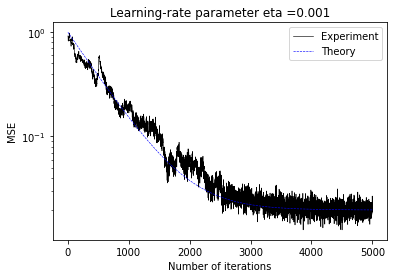

In [79]:
runT1(0.001)

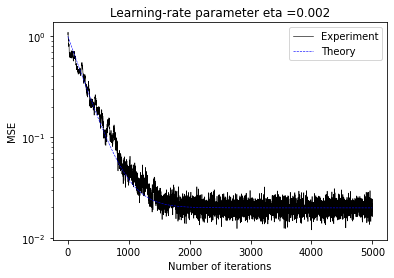

In [80]:
runT1(0.002)

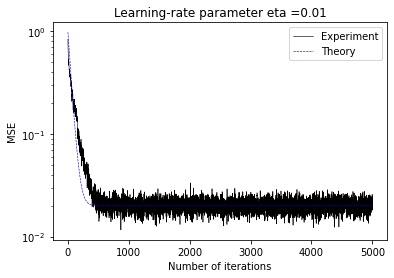

In [81]:
runT1(0.01)

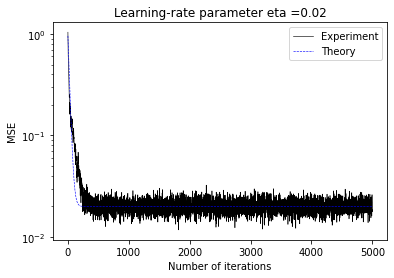

In [82]:
runT1(0.02)

Task2 :

In [5]:
# CSC/ECE/DA 427/527
# Fall 2020
# Lan Nguyen
# Task2 Project 2

from random import random
import matplotlib.pyplot as plt
from matplotlib.pylab import *
import math
import numpy as np
from sklearn.metrics import mean_squared_error

def moon(num_points, distance, radius, width):
    '''
    Function to create the double moon
    '''

    points = num_points

    x1 = [0 for _ in range(points)]
    y1 = [0 for _ in range(points)]
    x2 = [0 for _ in range(points)]
    y2 = [0 for _ in range(points)]

    for i in range(points):
        d = distance
        r = radius
        w = width
        a = random() * math.pi
        x1[i] = math.sqrt(random()) * math.cos(a) * (w / 2) + (
                    (-(r + w / 2) if (random() < 0.5) else (r + w / 2)) * math.cos(a))
        y1[i] = math.sqrt(random()) * math.sin(a) * (w) + (r * math.sin(a)) + d

        a = random() * math.pi + math.pi
        x2[i] = (r + w / 2) + math.sqrt(random()) * math.cos(a) * (w / 2) + (
            (-(r + w / 2)) if (random() < 0.5) else (r + w / 2)) * math.cos(a)
        y2[i] = -(math.sqrt(random()) * math.sin(a) * (-w) + (-r * math.sin(a))) - d
    return ([x1, x2, y1, y2])

def predict(x, w):
    sum = w[0]

    for i in range(len(x)):
        sum = sum + w[i+1]*x[i]
    if sum >=0: return 1.0
    else: return 0.0

def train(X, y, epochs, learningRate):
    """
    Trains all the vector in data.
    """
    Xn = np.ndarray.copy(X)
    yn = np.ndarray.copy(y)    

    #Normalise the X
    X_mean = np.mean(Xn, axis=0)
    X_std = np.std(Xn, axis=0)
    Xn -= X_mean
    X_std[X_std == 0] = 1
    Xn /= X_std

    y_mean = yn.mean(axis=0)
    yn -= y_mean

    Xn = np.hstack((np.ones(Xn.shape[0])[np.newaxis].T, Xn))
    sq_error = 0
    w = np.zeros(Xn[0].shape)
 
    mse_arr = []


    for i in range(epochs):
        sq_error = 0
        for x,y in zip(Xn, yn):
          
          response = np.dot(x, w)    
          error = y - response
          error_mse = (y) - predict(x[1:],w)
          sq_error += error_mse**2
          w = w + learningRate * x * error

        mse_arr.append(sq_error/len(Xn))
 
    return w, mse_arr

def getDataSet(num_points, distance, radius, width):
    '''
    Consider X as a 2D array with 2 columns and num_point rows.
    Consider y as desired output for each X[0] and X[1].
    '''
    x1, x2, y1, y2 = moon(num_points, distance, radius, width)

    x1 = np.array(x1)
    x2 = np.array(x2)
    x = concatenate((x1, x2))
    output1 = np.ones(num_points)

    y1 = np.array(y1)
    y2 = np.array(y2)
    y = concatenate((y1, y2))
    output2 = np.zeros((num_points))

    XX = np.vstack([x, y])
    YY = np.concatenate((output1, output2))

    return XX.T, YY


def draw_line(w, xx):
    '''
    Draw decision boundary
    w0 + w1x + w2y = 0 => y = -(w0 + w1x)/w2
    '''
    x = np.linspace(np.amin(xx),np.amax(xx),100)
    y = -(w[0]+x*w[1])/w[2]

    plt.plot(x, y, '--k',label="DB")


def runT2(distance = 1):
    x_train, y_train = getDataSet(500, distance, 10, 6)

    #Create dataset for testing
    x_test, y_test = getDataSet(1000, distance, 10, 6)

    print("Running...")
    w, mse = train(x_train, y_train, 50, 0.01)

    #Draw decision boundary

    figure(0)
    draw_line(w, x_train)

    #Plot the data points with decision boundary
    print("LMS for double moon classification d =",distance,": ")

    count = 0
    not_count = 0

    for i in range(len(y_test)):
        if predict(x_test[i], w) == y_test[i]:
            count += 1
        else: not_count += 1

        if x_test[i][0]*w[1] + x_test[i][1]*w[2] >= -w[0] :
            plt.scatter(x_test[i][0], x_test[i][1], marker='x', color='r')
        else:
            plt.scatter(x_test[i][0], x_test[i][1], marker='o', color='b')

    plt.axis([-20, 30, -20, 20])
    plt.show()
    print("Classification error: ",not_count/10,"%")
    print("Done!")

    return mse

    


Running...
LMS for double moon classification d = 1 : 


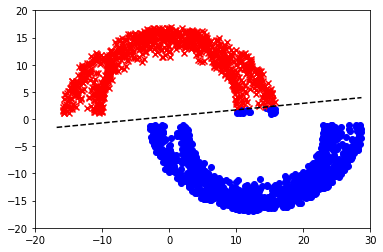

Classification error:  2.1 %
Done!


In [6]:
mse_d1 = runT2()

Running...
LMS for double moon classification d = 0 : 


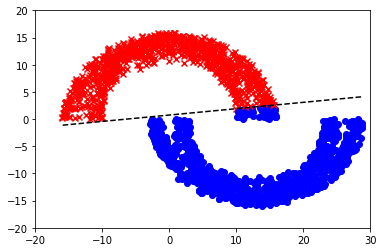

Classification error:  5.7 %
Done!


In [ ]:
mse_d0 = run(0)

Running...
LMS for double moon classification d = -4 : 


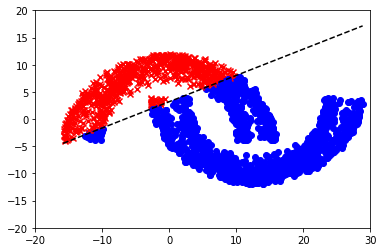

Classification error:  34.3 %
Done!


In [ ]:
mse_dm4 = run(-4)

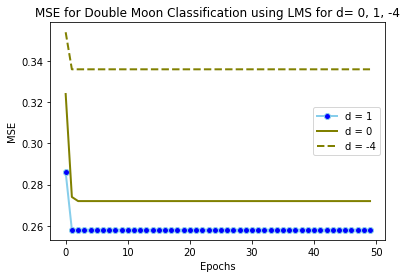

In [ ]:
iters = [i for i in range(50)]
plt.plot( iters, mse_d1, marker='.', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=2, label="d = 1")
plt.plot( iters, mse_d0, marker='', color='olive', linewidth=2,  label="d = 0")
plt.plot( iters, mse_dm4, marker='', color='olive', linewidth=2, linestyle='dashed', label="d = -4")
plt.ylabel('MSE')
plt.xlabel('Epochs')

plt.title('MSE for Double Moon Classification using LMS for d= 0, 1, -4')

plt.legend()
